In [10]:
import io
import os
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

In [11]:
def load_image_into_numpy_array(path):
    """Transform image file into numpy array. 
    
    Args: File's location
    
    Returns: uint8 numpy array 
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb')
    img_file = img_data.read()
    image = Image.open(BytesIO(img_file))
    (image_width, image_height) = image.size
    image_array = np.array(image.getdata()).reshape(image_height, image_width, 3).astype(np.uint8)
    return image_array

In [12]:
# Label Map
category_index = {
    1: {'id': 1, 'name': 'Mercedes'},
    2: {'id': 2, 'name': 'Red Bull Racing'},
    3: {'id': 3, 'name': 'Racing Point'},
    4: {'id': 4, 'name': 'McLaren'},
    5: {'id': 5, 'name': 'Renault'},
    6: {'id': 6, 'name': 'Ferrari'},
    7: {'id': 7, 'name': 'accident'},
}

In [15]:
start_time = time.time()
tf.keras.backend.clear_session()
model = tf.saved_model.load('C:/Users/Ricky K Nguyen/Desktop/Capstone/inference_graph/saved_model')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 12.57692575454712s


Elapsed time: 0.18819769223531088 second per image


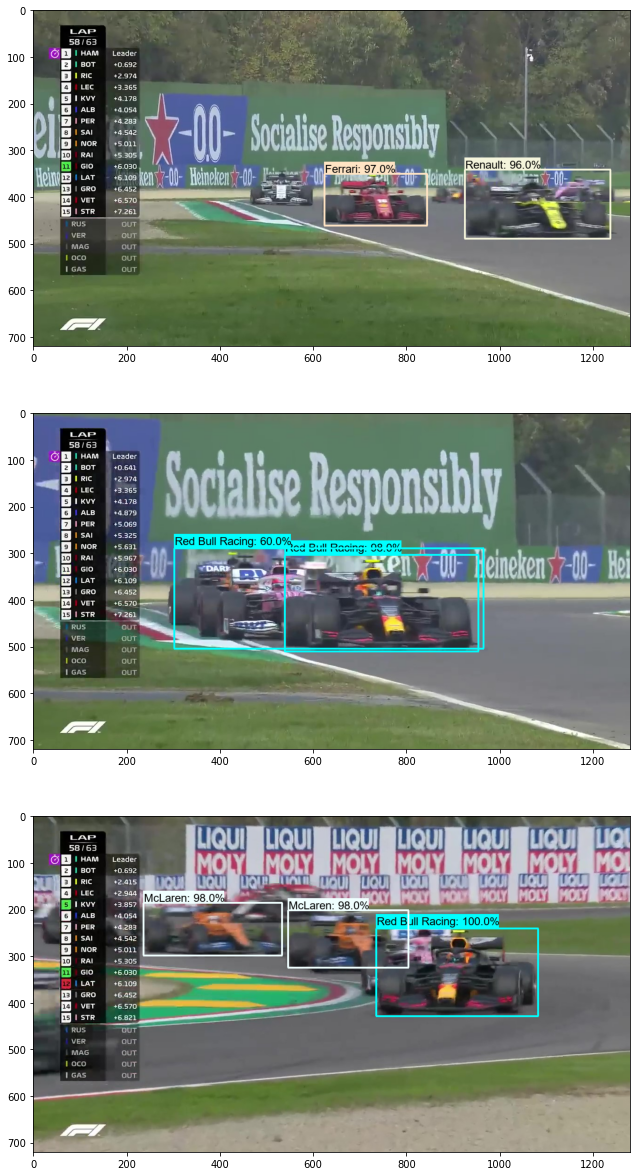

In [19]:
IMAGE_DIR = 'C:/Users/Ricky K Nguyen/Desktop/Capstone'

elapsed = []
for i in range(3):
    image_path = os.path.join(IMAGE_DIR, 'image' + str(i + 1) + '.jpg')
    image_np = load_image_into_numpy_array(image_path)
    tensor_input = np.expand_dims(image_np, 0)
    start_time = time.time()
    detections = model(tensor_input)
    end_time = time.time()
    elapsed.append(end_time - start_time)
    
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections, 
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=300,
        min_score_thresh=0.50, 
        agnostic_mode=False)
    plt.subplot(3, 1, i + 1)
    plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')